In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


In [37]:
corona_dataset_csv = pd.read_csv("https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv")
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,925,925,925,937,939,939,944,955,955,955
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672


In [38]:
corona_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054
1,NaN,Albania,0,0,0,0,0,0,0,0,...,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,925,925,925,937,939,939,944,955,955,955
4,NaN,Angola,0,0,0,0,0,0,0,0,...,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672


In [39]:
corona_dataset_aggregated=corona_dataset_csv.groupby("Country/Region").sum()
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054
Albania,0,0,0,0,0,0,0,0,0,0,...,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411
Algeria,0,0,0,0,0,0,0,0,0,0,...,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160
Andorra,0,0,0,0,0,0,0,0,0,0,...,925,925,925,937,939,939,944,955,955,955
Angola,0,0,0,0,0,0,0,0,0,0,...,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672


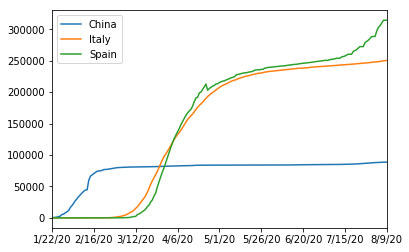

In [40]:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["Italy"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
plt.legend()

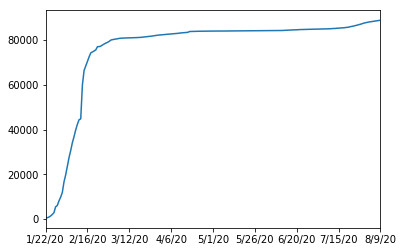

In [41]:
corona_dataset_aggregated.loc['China'].plot()

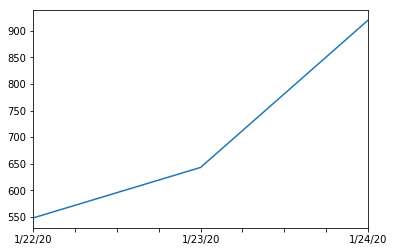

In [42]:
corona_dataset_aggregated.loc["China"][:3].plot()

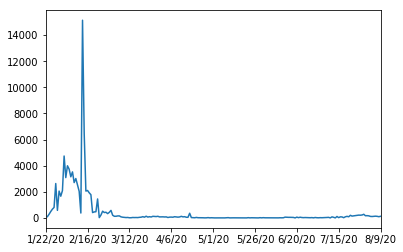

In [43]:
corona_dataset_aggregated.loc["China"].diff().plot()

In [44]:
countries= list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_infection_rates"]=max_infection_rates

In [45]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36710,36710,36747,36782,36829,36896,37015,37054,37054,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,5396,5519,5620,5750,5889,6016,6151,6275,6411,139.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,30950,31465,31972,32504,33055,33626,34155,34693,35160,675.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,925,925,937,939,939,944,955,955,955,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,1164,1199,1280,1344,1395,1483,1538,1572,1672,100.0


In [46]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rates"])
corona_data.head()

,max_infection_rates
Country/Region,
Afghanistan,915.0
Albania,139.0
Algeria,675.0
Andorra,79.0
Angola,100.0


In [47]:
# The code was removed by Watson Studio for sharing.

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [48]:
happiness_report_csv.drop(["Overall rank","Score","Generosity","Perceptions of corruption"],axis=1,inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [49]:
happiness_report_csv.set_index("Country or region",inplace=True)
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [50]:
corona_data.head()

,max_infection_rates
Country/Region,
Afghanistan,915.0
Albania,139.0
Algeria,675.0
Andorra,79.0
Angola,100.0


In [51]:
data=corona_data.join(happiness_report_csv, how="inner")
data.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,139.0,0.947,0.848,0.874,0.383
Algeria,675.0,1.002,1.160,0.785,0.086
Argentina,7513.0,1.092,1.432,0.881,0.471
Armenia,771.0,0.850,1.055,0.815,0.283


In [52]:
data.corr()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rates,1.000000,0.102588,0.071101,0.090568,0.087597
GDP per capita,0.102588,1.000000,0.757521,0.859431,0.394799
Social support,0.071101,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.090568,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.087597,0.394799,0.456317,0.423146,1.000000


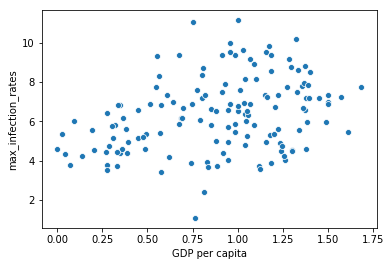

In [53]:
x=data["GDP per capita"]
y=data["max_infection_rates"]
sns.scatterplot(x,np.log(y))

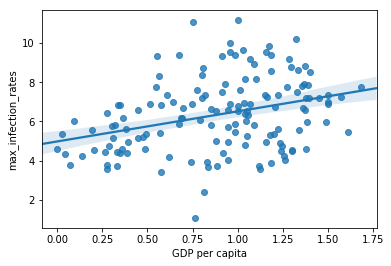

In [55]:
sns.regplot(x,np.log(y))

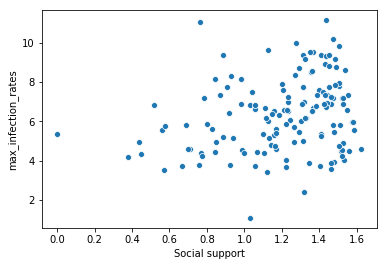

In [56]:
x=data["Social support"]
y=data["max_infection_rates"]
sns.scatterplot(x,np.log(y))

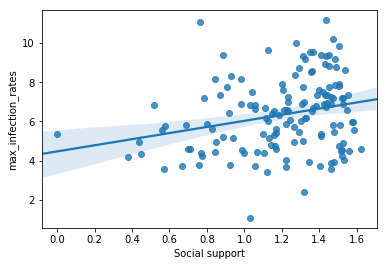

In [57]:
sns.regplot(x,np.log(y))

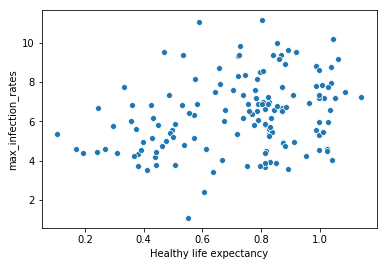

In [58]:
x=data["Healthy life expectancy"]
y=data["max_infection_rates"]
sns.scatterplot(x,np.log(y))

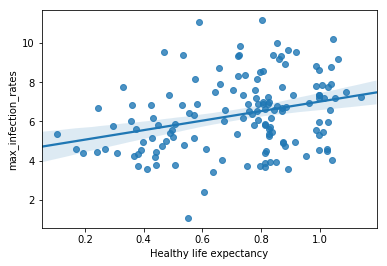

In [59]:
sns.regplot(x,np.log(y))

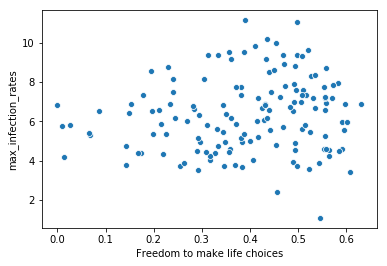

In [60]:
x=data["Freedom to make life choices"]
y=data["max_infection_rates"]
sns.scatterplot(x,np.log(y))

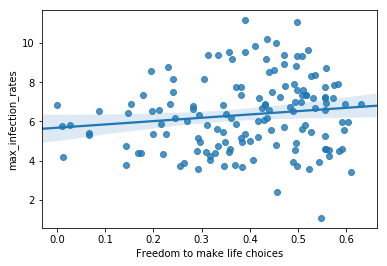

In [61]:
sns.regplot(x,np.log(y))